# Perkenalan

Nama : Mehdi Mursalat Ismail

Batch : FTDS-020-RMT

Dataset : Churn.csv

Objective : Memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

# Import Libraries

In [186]:
# Import Libraries

import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model


# Data Loading

In [187]:
# Data Loading

data = pd.read_csv('churn.csv')
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [188]:
data_eda = data.copy()

In [189]:
data.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

# EDA

<Axes: xlabel='age', ylabel='Density'>

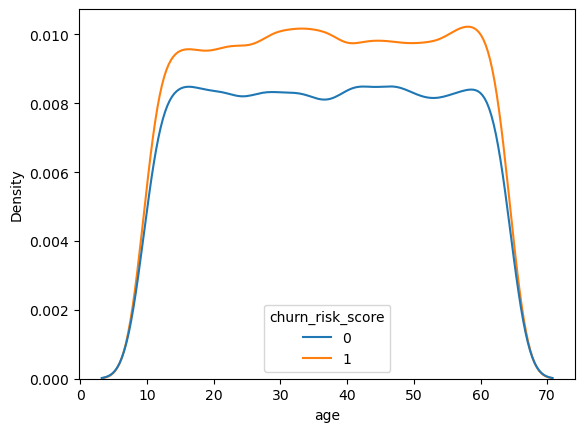

In [190]:
sns.kdeplot(data=data_eda, x="age", hue="churn_risk_score")

<Axes: xlabel='gender', ylabel='count'>

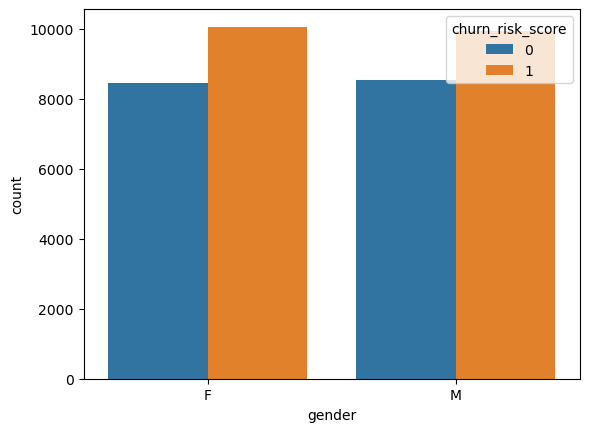

In [191]:
sns.countplot(data=data_eda ,x="gender", hue="churn_risk_score")

<Axes: xlabel='count', ylabel='membership_category'>

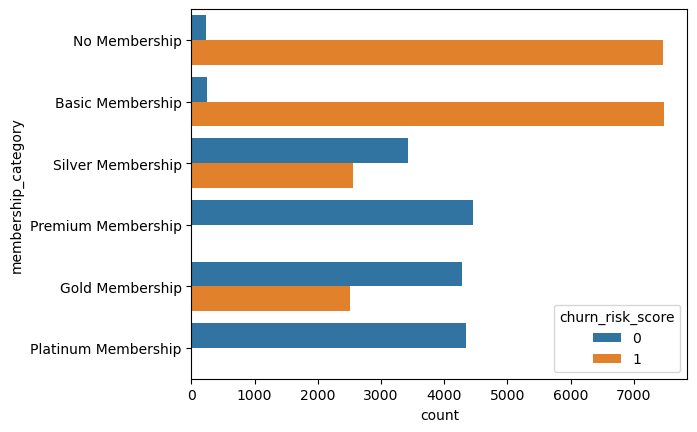

In [192]:
sns.countplot(data=data_eda ,y="membership_category", hue="churn_risk_score")

<Axes: xlabel='region_category', ylabel='count'>

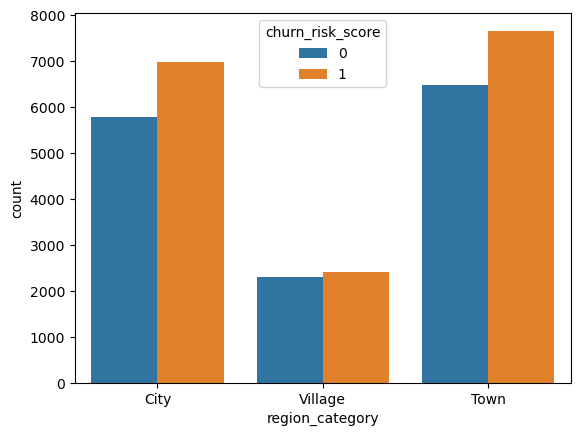

In [193]:
sns.countplot(data=data_eda ,x="region_category", hue="churn_risk_score")

<Axes: xlabel='medium_of_operation', ylabel='count'>

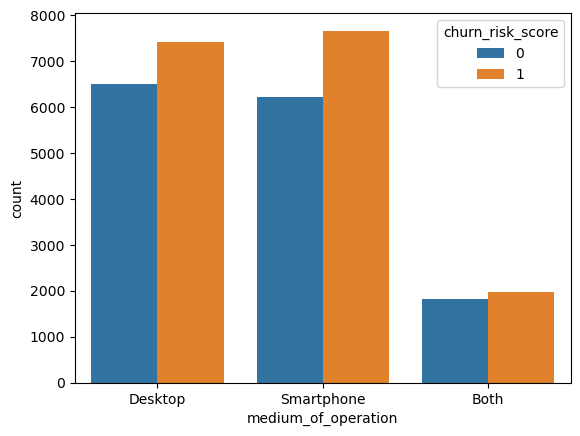

In [194]:
sns.countplot(data=data_eda ,x="medium_of_operation", hue="churn_risk_score")

Insights:

1. Chance of churn can happen in all ages
2. Churn mostly happen in user with no membership and basic membership
3. Most of churn happen to user who live in town and city
4. Most of churn happen to user that using only Smartphone as the medium of operation

# Feature Engineering

## Handling Missing Value

In [195]:
data.dropna(subset=['gender'], inplace=True)

In [196]:
data = data.drop(['region_category', 'joined_through_referral', 'medium_of_operation'], axis=1)

In [197]:
preferred_offer_types_mode = data['preferred_offer_types'].mode()[0]
data['preferred_offer_types'].fillna(preferred_offer_types_mode, inplace=True)

In [198]:
data.isnull().sum()

user_id                         0
age                             0
gender                          0
membership_category             0
joining_date                    0
preferred_offer_types           0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

## Splitting between Train-Set, Val-Set, and Test-Set

In [199]:
# Splitting between `X` and `y`

X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

In [200]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26696, 18)
Val Size :  (4712, 18)
Test Size :  (5543, 18)


In [201]:
# Check Missing Values on X_train

X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
membership_category             0
joining_date                    0
preferred_offer_types           0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [202]:
# Check Missing Values on X_val

X_val.isnull().sum()

user_id                         0
age                             0
gender                          0
membership_category             0
joining_date                    0
preferred_offer_types           0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [203]:
# Check Missing Values on X_test

X_test.isnull().sum()

user_id                         0
age                             0
gender                          0
membership_category             0
joining_date                    0
preferred_offer_types           0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

##  Feature Selection

In [204]:
# Display X_train

X_train

,user_id,age,gender,membership_category,joining_date,preferred_offer_types,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
32866,9f2044dd2a28e0f6,34,M,Platinum Membership,2015-06-25,Credit/Debit Card Offers,Fiber_Optic,07:42:36,6,1092.30,17650.65,17.0,770.250000,Yes,Yes,No,Not Applicable,Too many ads
14916,a50c4b389d5cd6da,52,M,Gold Membership,2016-05-08,Credit/Debit Card Offers,Fiber_Optic,18:46:13,12,68.27,68721.28,0.0,803.920000,Yes,No,Yes,Solved in Follow-up,User Friendly Website
23201,ba95855d0c636f3a,37,M,Platinum Membership,2016-02-12,Without Offers,Mobile_Data,12:38:53,16,708.40,1007.39,13.0,284.527886,Yes,Yes,No,Not Applicable,Reasonable Price
21389,b50ef8a8f32f1d4c,36,M,Silver Membership,2017-08-17,Credit/Debit Card Offers,Wi-Fi,15:14:15,7,0.00,43978.26,27.0,639.990000,Yes,No,No,Not Applicable,Poor Website
12329,aa848a74e2ec7616,40,M,Premium Membership,2016-05-22,Credit/Debit Card Offers,Fiber_Optic,15:47:19,6,148.32,15975.31,21.0,794.790000,Yes,No,No,Not Applicable,No reason specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30711,9c72f1990bd937db,60,M,Basic Membership,2016-01-11,Without Offers,Wi-Fi,20:06:38,14,159.89,4768.45,14.0,187.729835,No,Yes,Yes,Solved in Follow-up,Poor Customer Service
25670,b5176fb21e307d19,48,M,Silver Membership,2016-04-23,Without Offers,Mobile_Data,02:06:12,14,1335.14,1171.62,0.0,653.310000,No,Yes,Yes,Solved,Poor Customer Service
4010,889ed03f5ad74c50,63,M,Gold Membership,2015-06-05,Credit/Debit Card Offers,Wi-Fi,18:21:43,13,363.68,26208.60,10.0,76.421044,No,Yes,Yes,Solved in Follow-up,Poor Customer Service
27033,a9cdac3cdaa757b6,48,M,Gold Membership,2017-11-10,Without Offers,Fiber_Optic,08:46:25,15,138.22,32247.49,0.0,678.710000,Yes,No,Yes,Solved,No reason specified


In [205]:
# Drop Columns

X_train.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)
X_val.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)
X_test.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)

X_train

,age,gender,membership_category,preferred_offer_types,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
32866,34,M,Platinum Membership,Credit/Debit Card Offers,Fiber_Optic,6,1092.30,17650.65,17.0,770.250000,Yes,Yes,No,Not Applicable,Too many ads
14916,52,M,Gold Membership,Credit/Debit Card Offers,Fiber_Optic,12,68.27,68721.28,0.0,803.920000,Yes,No,Yes,Solved in Follow-up,User Friendly Website
23201,37,M,Platinum Membership,Without Offers,Mobile_Data,16,708.40,1007.39,13.0,284.527886,Yes,Yes,No,Not Applicable,Reasonable Price
21389,36,M,Silver Membership,Credit/Debit Card Offers,Wi-Fi,7,0.00,43978.26,27.0,639.990000,Yes,No,No,Not Applicable,Poor Website
12329,40,M,Premium Membership,Credit/Debit Card Offers,Fiber_Optic,6,148.32,15975.31,21.0,794.790000,Yes,No,No,Not Applicable,No reason specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30711,60,M,Basic Membership,Without Offers,Wi-Fi,14,159.89,4768.45,14.0,187.729835,No,Yes,Yes,Solved in Follow-up,Poor Customer Service
25670,48,M,Silver Membership,Without Offers,Mobile_Data,14,1335.14,1171.62,0.0,653.310000,No,Yes,Yes,Solved,Poor Customer Service
4010,63,M,Gold Membership,Credit/Debit Card Offers,Wi-Fi,13,363.68,26208.60,10.0,76.421044,No,Yes,Yes,Solved in Follow-up,Poor Customer Service
27033,48,M,Gold Membership,Without Offers,Fiber_Optic,15,138.22,32247.49,0.0,678.710000,Yes,No,Yes,Solved,No reason specified


## Get Numerical Columns and Categorical Columns

In [206]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['gender', 'membership_category', 'preferred_offer_types', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


## Pipeline

In [207]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OrdinalEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [208]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(26696, 15)

In [209]:
X_train

array([[-0.20296518,  0.20842517,  2.45800057, ...,  0.        ,
         1.        ,  7.        ],
       [ 0.93134726,  0.23473882, -0.6378886 , ...,  1.        ,
         3.        ,  8.        ],
       [-0.01391311,  0.25228126,  1.29737847, ...,  0.        ,
         1.        ,  6.        ],
       ...,
       [ 1.62453819,  0.23912443,  0.25520693, ...,  1.        ,
         3.        ,  1.        ],
       [ 0.67927783,  0.24789565, -0.42641291, ...,  1.        ,
         2.        ,  0.        ],
       [-1.33727761,  0.23912443, -0.74306714, ...,  0.        ,
         1.        ,  2.        ]])

# Sequential API

## Model Definition

In [210]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [211]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(15,))) # Hidden Layer 1
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


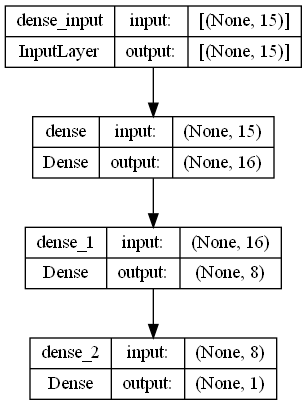

In [212]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

##  Model Training

In [213]:
# Train the Model

history_seq = model_sequential.fit(X_train,
                                   y_train,
                                   epochs=30,
                                   validation_data=(X_val, y_val),
                                   batch_size=10)

Epoch 1/30
2670/2670 [==============================] - 7s 2ms/step - loss: 0.5550 - accuracy: 0.7300 - val_loss: 0.5225 - val_accuracy: 0.7519
Epoch 2/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.5113 - accuracy: 0.7632 - val_loss: 0.5082 - val_accuracy: 0.7615
Epoch 3/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.4975 - accuracy: 0.7729 - val_loss: 0.4938 - val_accuracy: 0.7757
Epoch 4/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.4828 - accuracy: 0.7825 - val_loss: 0.4809 - val_accuracy: 0.7812
Epoch 5/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.4552 - accuracy: 0.7912 - val_loss: 0.4317 - val_accuracy: 0.7984
Epoch 6/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.3914 - accuracy: 0.8326 - val_loss: 0.3614 - val_accuracy: 0.8544
Epoch 7/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.3463 - accuracy: 0.8654 - val_loss: 0.3309 - val_accuracy:

## Model Improvement

In [214]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [215]:
# Create Sequential API

model_sequential2 = Sequential()
model_sequential2.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(15,))) # Hidden Layer 1
model_sequential2.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential2.add(Dense(4,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential2.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [216]:
history_seq2 = model_sequential2.fit(X_train,
                                   y_train,
                                   epochs=30,
                                   validation_data=(X_val, y_val),
                                   batch_size=10)

Epoch 1/30
2670/2670 [==============================] - 9s 3ms/step - loss: 0.5555 - accuracy: 0.7156 - val_loss: 0.5183 - val_accuracy: 0.7553
Epoch 2/30
2670/2670 [==============================] - 7s 2ms/step - loss: 0.5124 - accuracy: 0.7600 - val_loss: 0.5068 - val_accuracy: 0.7649
Epoch 3/30
2670/2670 [==============================] - 7s 2ms/step - loss: 0.4968 - accuracy: 0.7755 - val_loss: 0.4858 - val_accuracy: 0.7859
Epoch 4/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.4394 - accuracy: 0.8056 - val_loss: 0.3890 - val_accuracy: 0.8207
Epoch 5/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.3296 - accuracy: 0.8498 - val_loss: 0.3373 - val_accuracy: 0.8453
Epoch 6/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.2927 - accuracy: 0.8604 - val_loss: 0.2884 - val_accuracy: 0.8644
Epoch 7/30
2670/2670 [==============================] - 7s 2ms/step - loss: 0.2825 - accuracy: 0.8671 - val_loss: 0.2832 - val_accuracy:

## Model Evaluation

In [217]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.554985,0.729997,0.522511,0.751910
1,0.511327,0.763223,0.508198,0.761460
2,0.497511,0.772925,0.493838,0.775679
3,0.482823,0.782514,0.480944,0.781197
4,0.455167,0.791205,0.431673,0.798387
5,0.391439,0.832559,0.361393,0.854414
6,0.346334,0.865448,0.330927,0.868846
7,0.318174,0.873614,0.307539,0.879881
8,0.294044,0.884477,0.291296,0.886672
9,0.273595,0.895415,0.269449,0.899194


In [218]:
# Create DataFrame from ANN Improvement

history_seq2_df = pd.DataFrame(history_seq2.history)
history_seq2_df

,loss,accuracy,val_loss,val_accuracy
0,0.555485,0.715575,0.518251,0.755306
1,0.512426,0.760001,0.506757,0.764856
2,0.496777,0.775547,0.485841,0.785866
3,0.439396,0.805551,0.389041,0.820671
4,0.329559,0.849753,0.337252,0.845289
5,0.292749,0.860391,0.288365,0.864389
6,0.282457,0.867059,0.283166,0.879032
7,0.273919,0.877547,0.278682,0.875424
8,0.266814,0.885376,0.265022,0.883065
9,0.257943,0.891482,0.246414,0.901528


<Axes: >

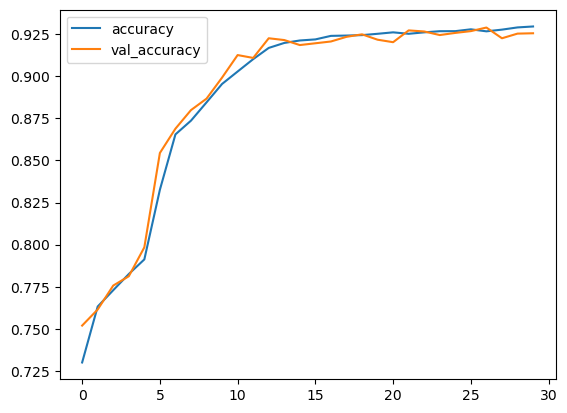

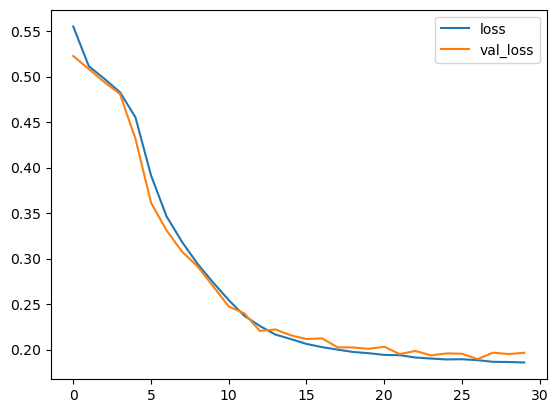

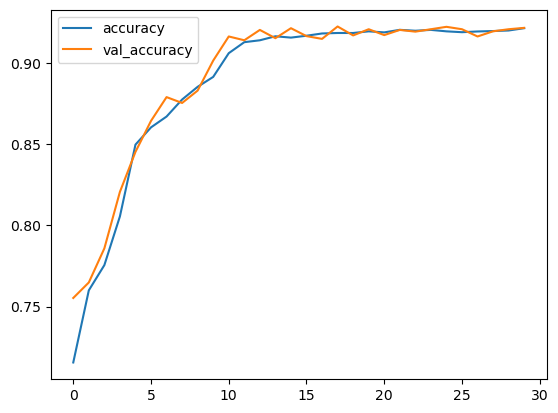

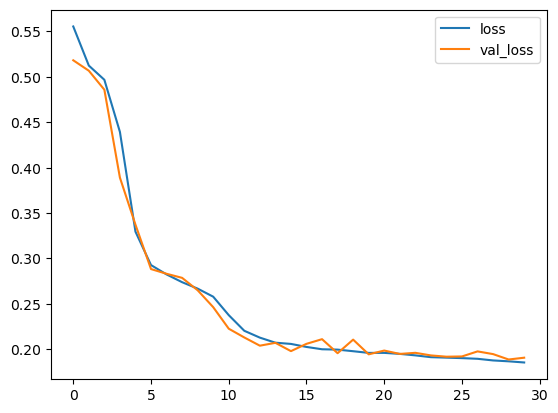

In [219]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()
history_seq2_df[['accuracy', 'val_accuracy']].plot()
history_seq2_df[['loss', 'val_loss']].plot()

In [220]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq2 = model_sequential2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
print(classification_report(y_test, y_pred_seq2))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2574
           1       0.95      0.90      0.92      2969

    accuracy                           0.92      5543
   macro avg       0.92      0.92      0.92      5543
weighted avg       0.92      0.92      0.92      5543

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2574
           1       0.94      0.91      0.92      2969

    accuracy                           0.92      5543
   macro avg       0.92      0.92      0.92      5543
weighted avg       0.92      0.92      0.92      5543



# Functional API

## Model Definition

In [221]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [222]:
# Create Functional Model

input_layer = Input(shape=(15,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           256         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 23)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

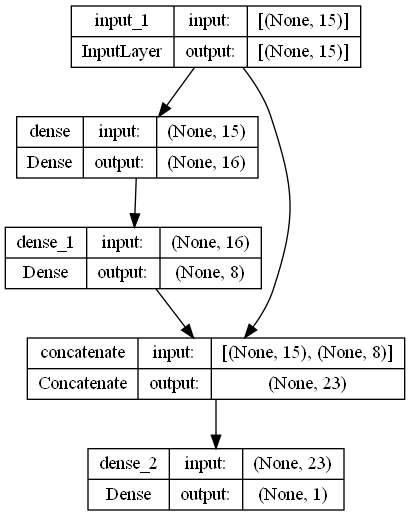

In [223]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## Model Training

In [224]:
# Train the Model

history_func = model_functional.fit(X_train,
                                    y_train,
                                    epochs=30,
                                    validation_data=(X_val, y_val),
                                    batch_size=10)

Epoch 1/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.5884 - accuracy: 0.7089 - val_loss: 0.5272 - val_accuracy: 0.7475
Epoch 2/30
2670/2670 [==============================] - 7s 2ms/step - loss: 0.5192 - accuracy: 0.7546 - val_loss: 0.5156 - val_accuracy: 0.7485
Epoch 3/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.5011 - accuracy: 0.7686 - val_loss: 0.4972 - val_accuracy: 0.7712
Epoch 4/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.4722 - accuracy: 0.7900 - val_loss: 0.4247 - val_accuracy: 0.8094
Epoch 5/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.3650 - accuracy: 0.8503 - val_loss: 0.3570 - val_accuracy: 0.8491
Epoch 6/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.3274 - accuracy: 0.8674 - val_loss: 0.3188 - val_accuracy: 0.8739
Epoch 7/30
2670/2670 [==============================] - 6s 2ms/step - loss: 0.3149 - accuracy: 0.8719 - val_loss: 0.3076 - val_accuracy:

## Model Improvement

In [225]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [226]:
# Create Functional Model

input_layer = Input(shape=(15,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
hidden_layer_3 = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           256         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 4)            36          ['dense_1[0][0]']                
                                                                                              

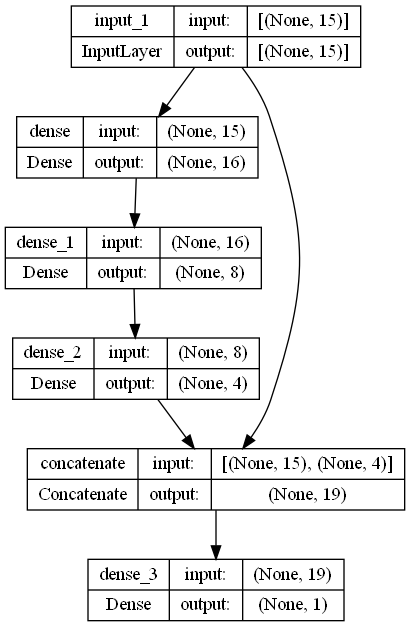

In [227]:
# Plot Layers

tf.keras.utils.plot_model(model_functional2, show_shapes=True)

In [228]:
# Train the Model

history_func2 = model_functional2.fit(X_train,
                                    y_train,
                                    epochs=30,
                                    validation_data=(X_val, y_val),
                                    batch_size=10)

Epoch 1/30
2670/2670 [==============================] - 8s 3ms/step - loss: 0.5999 - accuracy: 0.7071 - val_loss: 0.5231 - val_accuracy: 0.7475
Epoch 2/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.5139 - accuracy: 0.7591 - val_loss: 0.5164 - val_accuracy: 0.7513
Epoch 3/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.4978 - accuracy: 0.7704 - val_loss: 0.4943 - val_accuracy: 0.7738
Epoch 4/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.4557 - accuracy: 0.7957 - val_loss: 0.4147 - val_accuracy: 0.8137
Epoch 5/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.3692 - accuracy: 0.8501 - val_loss: 0.3511 - val_accuracy: 0.8466
Epoch 6/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.3265 - accuracy: 0.8669 - val_loss: 0.3135 - val_accuracy: 0.8788
Epoch 7/30
2670/2670 [==============================] - 7s 3ms/step - loss: 0.3074 - accuracy: 0.8747 - val_loss: 0.3036 - val_accuracy:

## Model Evaluation

In [229]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.588422,0.708945,0.527168,0.747453
1,0.519225,0.754607,0.515565,0.748514
2,0.501148,0.768580,0.497218,0.771222
3,0.472174,0.789969,0.424675,0.809423
4,0.364960,0.850315,0.356954,0.849109
5,0.327405,0.867433,0.318784,0.873939
6,0.314908,0.871928,0.307630,0.879669
7,0.306419,0.873652,0.306109,0.877971
8,0.301645,0.874850,0.303569,0.880306
9,0.297316,0.875449,0.300602,0.869482


In [230]:
history_func2_df = pd.DataFrame(history_func2.history)
history_func2_df

,loss,accuracy,val_loss,val_accuracy
0,0.599940,0.707147,0.523130,0.747453
1,0.513896,0.759140,0.516368,0.751273
2,0.497809,0.770415,0.494320,0.773769
3,0.455690,0.795700,0.414729,0.813667
4,0.369243,0.850127,0.351100,0.846562
5,0.326478,0.866909,0.313453,0.878820
6,0.307411,0.874738,0.303590,0.878396
7,0.296265,0.878596,0.291738,0.876698
8,0.286056,0.880919,0.282826,0.885187
9,0.275711,0.885751,0.279476,0.882640


<Axes: >

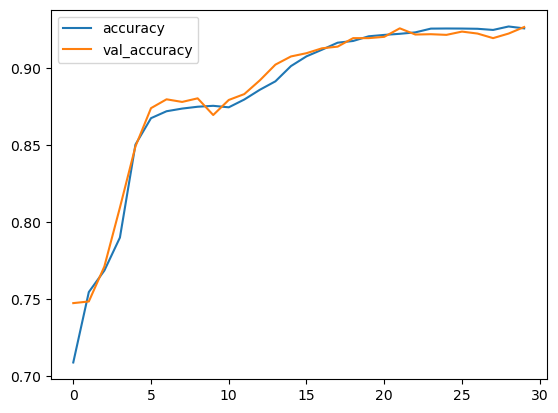

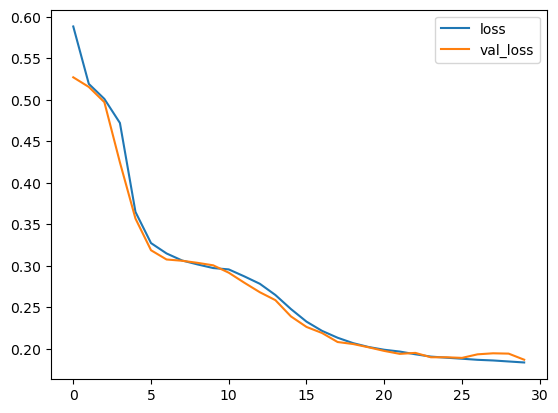

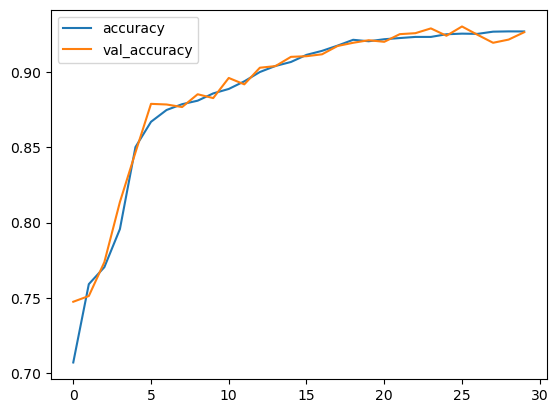

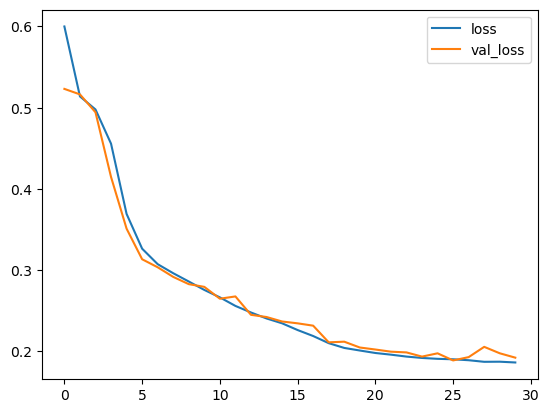

In [231]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()
history_func2_df[['accuracy', 'val_accuracy']].plot()
history_func2_df[['loss', 'val_loss']].plot()

In [232]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
y_pred_func2 = model_functional2.predict(X_test)
y_pred_func2 = np.where(y_pred_func2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))
print(classification_report(y_test, y_pred_func2))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2574
           1       0.94      0.92      0.93      2969

    accuracy                           0.92      5543
   macro avg       0.92      0.92      0.92      5543
weighted avg       0.92      0.92      0.92      5543

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2574
           1       0.93      0.93      0.93      2969

    accuracy                           0.92      5543
   macro avg       0.92      0.92      0.92      5543
weighted avg       0.92      0.92      0.92      5543



# Model Saving

In [233]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [234]:
# Model Summary

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [235]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 0
Non-trainable params: 401
_________________________________________________________________


In [236]:
# Save ANN Model

model_sequential.save('churn_model.h5')

# Model Inference

## Load Model

In [237]:
# Load All Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = pickle.load(file_1)

model_ann = load_model('churn_model.h5')

## Inferencing

In [238]:
# Create A New Data

data_inf = {
    'age':36,
    'gender': 'M',
    'membership_category': 'Gold Membership',
    'preferred_offer_types': 'Without Offers',
    'internet_option': 'Fiber_Optic',
    'days_since_last_login': 3,
    'avg_time_spent': 972.776679,
    'avg_transaction_value': 26905.49,
    'avg_frequency_login_days': 22.0,
    'points_in_wallet': 700.93,
    'used_special_discount': 'Yes',
    'offer_application_preference': 'No',
    'past_complaint': 'Yes',
    'complaint_status': 'No Information Available',
    'feedback': 'Poor Customer Service'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,age,gender,membership_category,preferred_offer_types,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,36,M,Gold Membership,Without Offers,Fiber_Optic,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service


In [239]:
# Predict using ANN

data_inf_transform = model_pipeline.transform(data_inf)
y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 62ms/step


array([[1]])

# Conclusion

1. Kedua model ANN yang dibuat memiliki tingkat akurasi dan recall yang sama, dengan akurasi 0.92 dan recall 0.92
2. Model yang dibangun sudah dapat memprediksi churn score user dengan tingkat akurasi sebesar 0.92 dan recall sebesar 0.92
3. Hasil inferencing didapatkan bahwa model meprediksi data termasuk kedalam churn score 1, dimana sesuai dengan data asli pada frame yaitu data ke 37009
4. Setelah dilakukan improvement pada ANN dengan menambahkan satu hidden layer, tidak didapatkan perubahan pada akurasi dan recall